In [1]:
import music21 as m21

# Exploring Harmonic structures
Let's approach harmony from the bottom up starting with notes, defining scales, and then start building chords and chord progressions.

To get started let's define our building blocks: the 12 notes.

In [2]:
notes = ('C','C#','D','D#','E','F','F#','G','G#','A','A#','B')
len(notes)


12

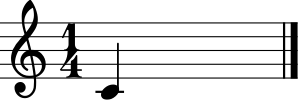

In [3]:
m21.note.Note('C').show()


## Scales
Let's use notes to build scales.

In [4]:
chromatic = m21.stream.Stream([m21.note.Note(n) for n in notes])


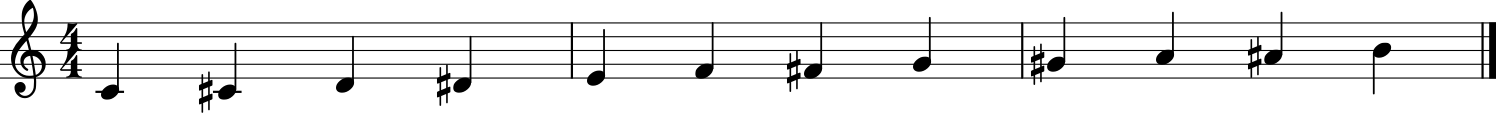

In [5]:
chromatic.show()


In [7]:
chromatic.show('midi')

In [12]:
## 

## Scales and keys
Scales are typically associated with keys. Let's look at the C major scale.

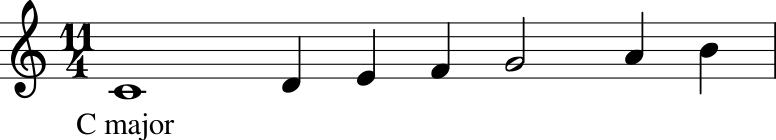

In [12]:
C = m21.key.Key('C')
C.show()

The same notes define other scales depending on where the scale starts, for example if we start on A we get a minor scale.

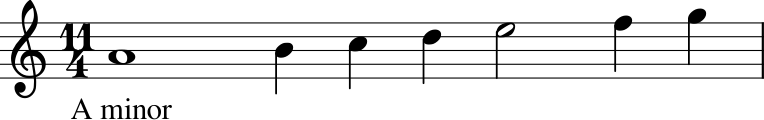

In [17]:
A = C.getScale('minor')
A.show()

In [23]:
C.mode

'major'

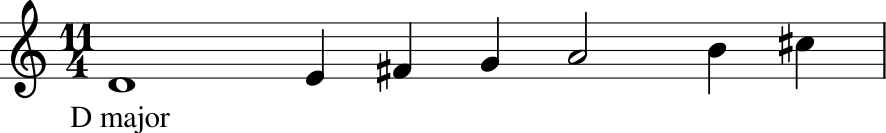

In [26]:
m21.roman.scale.MajorScale('d').show()

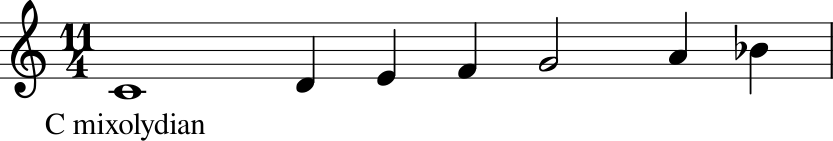

In [44]:
cl = m21.roman.scale.MixolydianScale('c')
cl.show()

In [40]:
cl.

TypeError: ConcreteScale.deriveByDegree() missing 2 required positional arguments: 'degree' and 'pitchRef'

In [42]:
i = notes.index('E')
notes[i:] + notes[:i]

('E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B', 'C', 'C#', 'D', 'D#')

In [61]:
rn = cl.romanNumeral(7)
str(rn.root())

'B-4'

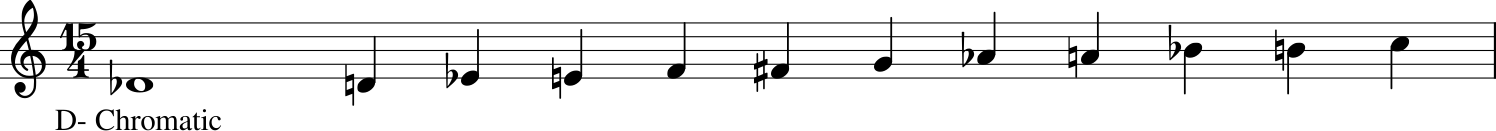

In [59]:
m21.roman.scale.ChromaticScale('d-').show()

In [ ]:
cl.pitches

In [ ]:
cs = m21.scale.ChromaticScale('C')
cs.pitches

In [ ]:
for i in [0, 2, 4, 5, 7, 9, 10]:
    print(cs.pitches[i].name)

In [ ]:
hs = m21.scale.HarmonicMinorScale('E-')
hs.pitches

In [70]:
cs = m21.scale.ChromaticScale('C')
cs.pitches

[<music21.pitch.Pitch C4>,
 <music21.pitch.Pitch C#4>,
 <music21.pitch.Pitch D4>,
 <music21.pitch.Pitch E-4>,
 <music21.pitch.Pitch E4>,
 <music21.pitch.Pitch F4>,
 <music21.pitch.Pitch F#4>,
 <music21.pitch.Pitch G4>,
 <music21.pitch.Pitch A-4>,
 <music21.pitch.Pitch A4>,
 <music21.pitch.Pitch B-4>,
 <music21.pitch.Pitch B4>,
 <music21.pitch.Pitch C5>]

In [71]:
for i in [0, 2, 4, 5, 7, 9, 10]:
    print(cs.pitches[i].name)

C
D
E
F
G
A
B-


In [72]:
hs = m21.scale.HarmonicMinorScale('E-')
hs.pitches

[<music21.pitch.Pitch E-4>,
 <music21.pitch.Pitch F4>,
 <music21.pitch.Pitch G-4>,
 <music21.pitch.Pitch A-4>,
 <music21.pitch.Pitch B-4>,
 <music21.pitch.Pitch C-5>,
 <music21.pitch.Pitch D5>,
 <music21.pitch.Pitch E-5>]